In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,mean_squared_error
from sklearn.preprocessing import StandardScaler
import joblib
from sklearn import datasets

In [3]:
iris=datasets.load_iris()

In [4]:
X=iris.data
y=iris.target

In [6]:
iris_df=pd.DataFrame(data=iris.data,columns=iris.feature_names)
iris_df['Tür']=pd.Categorical.from_codes(iris.target,iris.target_names)

<Figure size 1200x1000 with 0 Axes>

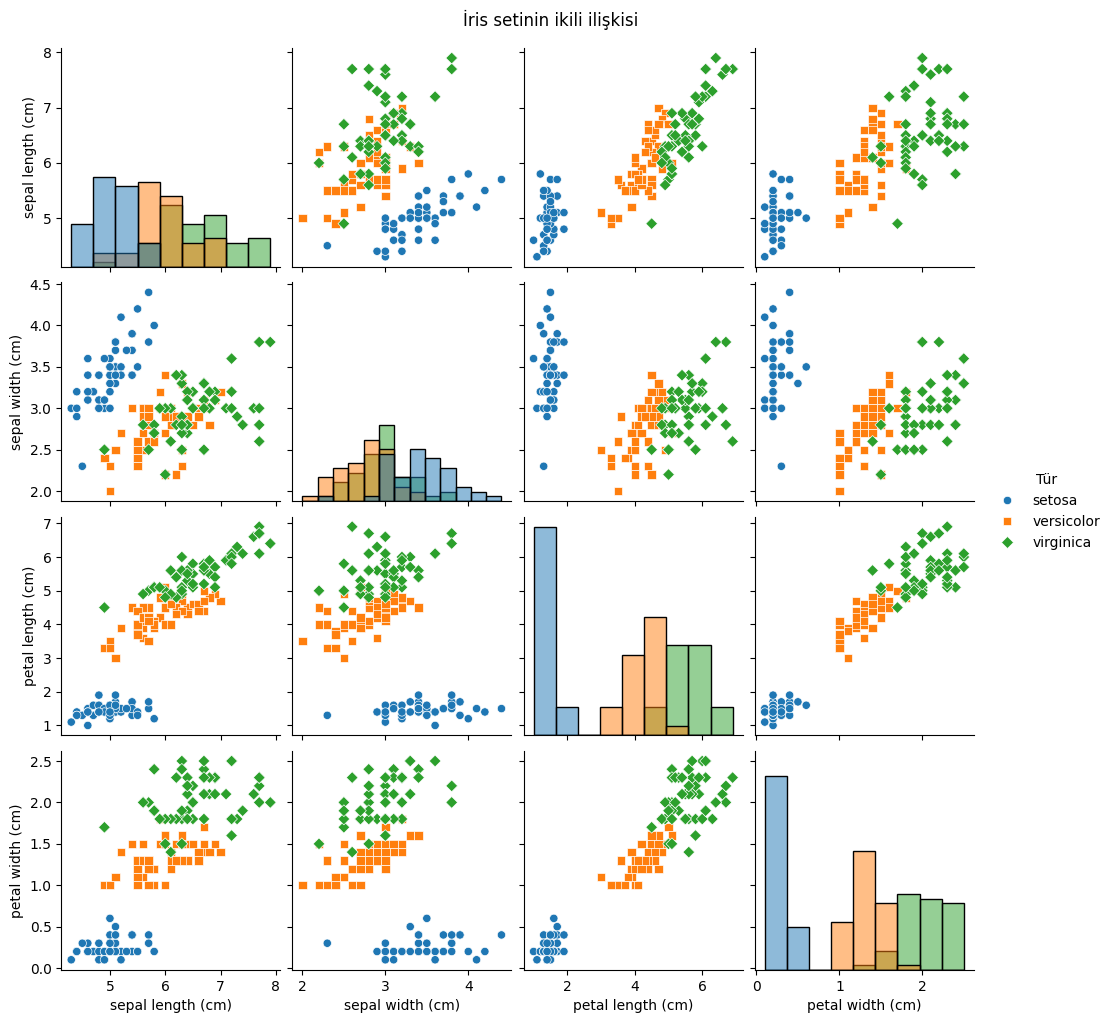

In [9]:
#pairplot oluşturma
plt.figure(figsize=(12,10))
sns.pairplot(iris_df,hue='Tür',diag_kind='hist',markers=['o','s','D'])
plt.suptitle('İris setinin ikili ilişkisi',y=1.02)
plt.show()

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=0)


In [11]:
#özelliklerin ölçeklendirmesi
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

## **Logistic Regression**

In [12]:
logr=LogisticRegression(random_state=0)
logr.fit(X_train,y_train)


LogisticRegression(random_state=0)

## **K Nearest Neighbors (KNN)**

In [13]:
knn=KNeighborsClassifier(n_neighbors=1,metric='minkowski')
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

## **Support Vector Machines (SVM)**

In [14]:
svc=SVC(kernel='poly',random_state=0)
svc.fit(X_train,y_train)

SVC(kernel='poly', random_state=0)

## **Modellerin Kaydedilmesi**

In [15]:
joblib.dump(logr,'logr.pkl')
joblib.dump(knn,'knn.pkl')
joblib.dump(svc,'svc.pkl')

['svc.pkl']

In [16]:
loaded_logr=joblib.load('logr.pkl')
loaded_knn=joblib.load('knn.pkl')
loaded_svc=joblib.load('svc.pkl')

## **Yüklenen Modellerle Tahmin**

In [17]:
y_pred_loaded_logr=loaded_logr.predict(X_test)
y_pred_loaded_knn=loaded_knn.predict(X_test)
y_pred_loaded_svc=loaded_svc.predict(X_test)

## **Performans Ölçümü**

In [21]:
accuracy_logr=accuracy_score(y_test,y_pred_loaded_logr)
accuracy_knn=accuracy_score(y_test,y_pred_loaded_knn)
accuracy_svc=accuracy_score(y_test,y_pred_loaded_svc)

print('Logistic Regression Confusion Matrix:')
print(confusion_matrix(y_test,y_pred_loaded_logr))
print(f'Logistic Regression Accuracy: {accuracy_logr*100:.2f}%')

print('\nK Nearest Neighbors Confusion Matrix:')
print(confusion_matrix(y_test,y_pred_loaded_knn))
print(f'K Nearest Neighbors Accuracy: {accuracy_knn*100:.2f}%')

print('\nSupport Vector Machines Confusion Matrix:')
print(confusion_matrix(y_test,y_pred_loaded_svc))
print(f'Support Vector Machines Accuracy: {accuracy_svc*100:.2f}%')

Logistic Regression Confusion Matrix:
[[16  0  0]
 [ 0 18  1]
 [ 0  2 13]]
Logistic Regression Accuracy: 94.00%

K Nearest Neighbors Confusion Matrix:
[[16  0  0]
 [ 0 17  2]
 [ 0  2 13]]
K Nearest Neighbors Accuracy: 92.00%

Support Vector Machines Confusion Matrix:
[[16  0  0]
 [ 0 19  0]
 [ 0  6  9]]
Support Vector Machines Accuracy: 88.00%


## **Multi Linear Regression**

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import joblib

In [24]:
#Veri seti oluşturma 2023-2024 ait veri

Hisse_Senedi = {

    "Yıl":[2024,2024,2024,2024,2024,2024,2024,2024,2024,2024,2024,2024,

           2023,2023,2023,2023,2023,2023,2023,2023,2023,2023,2023,2023],

    "Ay":[12,11,10,9,8,7,6,5,4,3,2,1,

          12,11,10,9,8,7,6,5,4,3,2,1],

    "Faiz_Oranı": [3.25,

                  3.0,3.0,

                  2.75,2.75,2.75,2.75,

                  2.5,2.5,2.5,2.5,2.25,2.25,2.25,2.25,2.25,2.25,2.25,2.25,

                  2.0,2.0,2.0,2.0,

                  1.75],



    'İşsizlik_Oranı': [5.1, 5.0, 5.0, 5.2, 5.3, 5.4, 5.4, 5.3, 5.3, 5.4, 5.5, 5.6,

                       5.7, 5.6, 5.5, 5.4, 5.4, 5.5, 5.6, 5.6, 5.7, 5.8, 5.9, 6.0],



    'Hisse_Endeksi_Fiyatı': [1560, 1500, 1480, 1450, 1430, 1400, 1390, 1375, 1350, 1330,

                             1310, 1290, 1250, 1230, 1215, 1200, 1180, 1150, 1130, 1110, 1090, 1075, 1050, 1030]

}

In [25]:
#DataFrame oluşturma
df=pd.DataFrame(Hisse_Senedi)


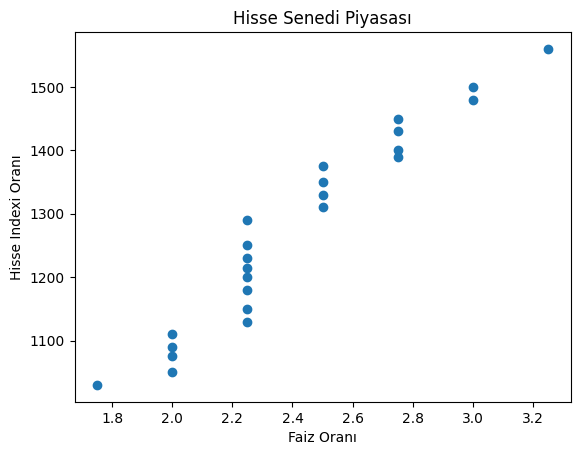

In [27]:
#Görselleşirme
plt.title("Hisse Senedi Piyasası")
plt.ylabel("Hisse Indexi Oranı")
plt.xlabel("Faiz Oranı")
plt.scatter(df["Faiz_Oranı"],df["Hisse_Endeksi_Fiyatı"])
plt.show()

In [28]:
#Korelasyon Matris
#Korelasyon Değeri: if 1 pozitif mükemmel bir ilişkisi var, 0 ise aralarında ilişki yok
print('Korelasyon Matrisi:')
print(df.corr())

Korelasyon Matrisi:
                               Yıl            Ay  Faiz_Oranı  İşsizlik_Oranı  \
Yıl                   1.000000e+00  7.884865e-14    0.797724       -0.696909   
Ay                    7.884865e-14  1.000000e+00    0.536452       -0.567194   
Faiz_Oranı            7.977240e-01  5.364517e-01    1.000000       -0.903878   
İşsizlik_Oranı       -6.969095e-01 -5.671941e-01   -0.903878        1.000000   
Hisse_Endeksi_Fiyatı  8.706845e-01  4.878562e-01    0.965505       -0.889462   

                      Hisse_Endeksi_Fiyatı  
Yıl                               0.870684  
Ay                                0.487856  
Faiz_Oranı                        0.965505  
İşsizlik_Oranı                   -0.889462  
Hisse_Endeksi_Fiyatı              1.000000  


In [29]:
X=df.iloc[:,2:4].values
y=df.iloc[:,4].values

In [30]:
#Modelin Eğitilmesi
#Linear Regression Modelinin oluşturulması
reg=LinearRegression()
reg.fit(X,y)

LinearRegression()

In [31]:
joblib.dump(reg,'Hisse_Senedi_Modeli.pkl')

['Hisse_Senedi_Modeli.pkl']

In [32]:
loaded_model=joblib.load('Hisse_Senedi_Modeli.pkl')

In [34]:
#Kullanıcıdan girdi alarak 2025 tahmini
faiz_orani_2025=float(input("2025 için Faiz Oranı Giriniz: "))
issizlik_orani_2025=float(input("2025 için İşsizlik Oranı Giriniz: "))
tahmin=loaded_model.predict([[faiz_orani_2025,issizlik_orani_2025]])
print('2025 için Tahmini Hisse Endexi Fiyatı: ',round(tahmin[0]))

2025 için Faiz Oranı Giriniz: 3.5
2025 için İşsizlik Oranı Giriniz: 5.2
2025 için Tahmini Hisse Endexi Fiyatı:  1684


In [40]:
print('Modelin Doğruluk Oranı(R2 Score): ',reg.score(X,y)*100,'%')

Modelin Doğruluk Oranı(R2 Score):  93.37351028879716 %
